# <a id='toc1_'></a>[Machine Learning](#toc0_)

**Note:** _Reference notebook_:

**Season:** 02

**Lesson id:** 13

**Time:** 00:00:00

---

**Table of contents**<a id='toc0_'></a>    
- [Machine Learning](#toc1_)    
  - [01 - Introduction](#toc1_1_)    
  - [02 - Regression](#toc1_2_)    
    - [Lesson 06: numpy](#toc1_2_1_)    
    - [Lesson 07: pandas](#toc1_2_2_)    
    - [Lesson 08: matplotlib](#toc1_2_3_)    
    - [Lesson 09: Simple Regression](#toc1_2_4_)    
    - [Lesson 12: Multipe Linear Regression](#toc1_2_5_)    
    - [Lesson 14: Polynomial Regression](#toc1_2_6_)    
    - [Lesson 15: Non Linear Regression Analysis](#toc1_2_7_)    
  - [03 - Classification](#toc1_3_)    
    - [Lesson 05: KNN (K-Nearest Neighbors)](#toc1_3_1_)    
    - [Lesson 09: Decision Trees](#toc1_3_2_)    
    - [Lesson 1-:](#toc1_3_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

import packages

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


Add options

In [2]:
plt.style.use('default')
%matplotlib inline


## <a id='toc1_1_'></a>[01 - Introduction](#toc0_)

Theory.

## <a id='toc1_2_'></a>[02 - Regression](#toc0_)

### <a id='toc1_2_1_'></a>[Lesson 06: numpy](#toc0_)

In [8]:
a = np.arange(15)
a


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [12]:
b = a.reshape(3, 5)
b


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [26]:
print(a.shape)
print(b.shape)
print(b.ndim)
print(b.size)

print('-'*15)

print(type(a))
print(type(b))

print('-'*15)

print(a.dtype)
print(b.dtype)


(15,)
(3, 5)
2
15
---------------
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
---------------
int32
int32


In [28]:
np.zeros((3, 4)).astype(np.int32)


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

Some operations

In [32]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)


In [33]:
print(a)
print(b)


[20 30 40 50]
[0 1 2 3]


In [35]:
print(a - b)
print(a * b)
print(a ** b)


[20 29 38 47]
[  0  30  80 150]
[     1     30   1600 125000]


In [36]:
c = a * b
print(c)


[  0  30  80 150]


In [37]:
c > 50


array([False, False,  True,  True])

In [38]:
c[c > 50]


array([ 80, 150])

In [45]:
print(a)
print(np.sin(a))
print(np.max(a))
print(np.argmax(a))


[20 30 40 50]
[ 0.91294525 -0.98803162  0.74511316 -0.26237485]
50
3


In [48]:
print(np.info(a))


class:  ndarray
shape:  (4,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x298e9dc68d0
byteorder:  little
byteswap:  False
type: int32
None


not a number

In [52]:
np.nan


nan

nan to number (nan -> 0)

In [56]:
a = np.array([1, 5, np.nan, 8, np.nan])
np.nan_to_num(a)


array([1., 5., 0., 8., 0.])

Random number from standard norma distribution

In [88]:
np.random.randn(3, 2)


array([[ 1.25961026, -0.99160632],
       [ 0.86262725, -0.21037351],
       [-0.44372129,  0.56006162]])

### <a id='toc1_2_2_'></a>[Lesson 07: pandas](#toc0_)

In [544]:
a = pd.Series([1, 2, 3, 'ali', 0, np.nan, -1])
print(a)

print()

print('Type:', type(a))


0      1
1      2
2      3
3    ali
4      0
5    NaN
6     -1
dtype: object

Type: <class 'pandas.core.series.Series'>


In [545]:
dates = pd.date_range('2021-01-01', periods=6, freq='D')
dates


DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [546]:
rnd = np.random.randn(6, 4)
print(rnd)


[[-2.4561981  -0.53723824  0.22037337 -0.373378  ]
 [ 0.03266621 -0.10425706 -0.08829907 -0.66278687]
 [-1.36150232  0.77194402  0.08195671 -0.10030524]
 [-1.43789408  0.16451032 -0.87070853  0.6108024 ]
 [-0.21534626  0.17321792 -0.58840575  1.85349805]
 [-1.21315302  0.33090843 -0.08670112  0.34150258]]


In [547]:
df = pd.DataFrame(rnd)
print(df)  # with print() function


          0         1         2         3
0 -2.456198 -0.537238  0.220373 -0.373378
1  0.032666 -0.104257 -0.088299 -0.662787
2 -1.361502  0.771944  0.081957 -0.100305
3 -1.437894  0.164510 -0.870709  0.610802
4 -0.215346  0.173218 -0.588406  1.853498
5 -1.213153  0.330908 -0.086701  0.341503


In [548]:
df = pd.DataFrame(rnd)
df  # without print() function; *Recommended*


,0,1,2,3
0,-2.456198,-0.537238,0.220373,-0.373378
1,0.032666,-0.104257,-0.088299,-0.662787
2,-1.361502,0.771944,0.081957,-0.100305
3,-1.437894,0.164510,-0.870709,0.610802
4,-0.215346,0.173218,-0.588406,1.853498
5,-1.213153,0.330908,-0.086701,0.341503


change index (index is rows name)

In [549]:
df = pd.DataFrame(rnd, index=dates)
df


,0,1,2,3
2021-01-01,-2.456198,-0.537238,0.220373,-0.373378
2021-01-02,0.032666,-0.104257,-0.088299,-0.662787
2021-01-03,-1.361502,0.771944,0.081957,-0.100305
2021-01-04,-1.437894,0.164510,-0.870709,0.610802
2021-01-05,-0.215346,0.173218,-0.588406,1.853498
2021-01-06,-1.213153,0.330908,-0.086701,0.341503


change Columns name

In [550]:
df = pd.DataFrame(rnd, index=dates, columns=['A', 'B', 'C', 'D'])
df


,A,B,C,D
2021-01-01,-2.456198,-0.537238,0.220373,-0.373378
2021-01-02,0.032666,-0.104257,-0.088299,-0.662787
2021-01-03,-1.361502,0.771944,0.081957,-0.100305
2021-01-04,-1.437894,0.164510,-0.870709,0.610802
2021-01-05,-0.215346,0.173218,-0.588406,1.853498
2021-01-06,-1.213153,0.330908,-0.086701,0.341503


Get count of every value

In [554]:
df.A.value_counts()


-2.456198    1
 0.032666    1
-1.361502    1
-1.437894    1
-0.215346    1
-1.213153    1
Name: A, dtype: int64

Or

In [555]:
df['A'].value_counts()


-2.456198    1
 0.032666    1
-1.361502    1
-1.437894    1
-0.215346    1
-1.213153    1
Name: A, dtype: int64

In [557]:
df.A.values


array([-2.4561981 ,  0.03266621, -1.36150232, -1.43789408, -0.21534626,
       -1.21315302])

Or

In [558]:
df['A'].values


array([-2.4561981 ,  0.03266621, -1.36150232, -1.43789408, -0.21534626,
       -1.21315302])

Slicing

In [34]:
df.A


2021-01-01   -0.012160
2021-01-02    0.902158
2021-01-03   -0.212657
2021-01-04   -0.398090
2021-01-05   -0.954243
2021-01-06    1.578169
Freq: D, Name: A, dtype: float64

Or

In [35]:
df['A']


2021-01-01   -0.012160
2021-01-02    0.902158
2021-01-03   -0.212657
2021-01-04   -0.398090
2021-01-05   -0.954243
2021-01-06    1.578169
Freq: D, Name: A, dtype: float64

In [144]:
df[['A']]  # with df['A'] works but df[['A']] is Recommended.


,A
2021-01-01,-0.997844
2021-01-02,-0.772336
2021-01-03,-0.944428
2021-01-04,0.077140
2021-01-05,1.060101
2021-01-06,-0.691160


In [156]:
df[['A', 'C']]


,A,C
2021-01-01,-0.997844,1.068288
2021-01-02,-0.772336,-0.729380
2021-01-03,-0.944428,-0.395393
2021-01-04,0.077140,0.477122
2021-01-05,1.060101,-0.662609
2021-01-06,-0.691160,-0.160347


indexing by location of rows

In [141]:
df.iloc[0]  # Not Recommended


A   -0.997844
B    0.546717
C    1.068288
D   -0.221077
Name: 2021-01-01 00:00:00, dtype: float64


In [195]:
df.iloc[[0]]


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077


In [154]:
df.iloc[[0, 2]]


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055


In [197]:
df[2:4]  # Other and Better way


,A,B,C,D
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055
2021-01-04,0.077140,2.428425,0.477122,1.372915


In [198]:
df[2:]


,A,B,C,D
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055
2021-01-04,0.077140,2.428425,0.477122,1.372915
2021-01-05,1.060101,-0.280446,-0.662609,0.189042
2021-01-06,-0.691160,-1.824151,-0.160347,-0.048559


In [200]:
df[:3]


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055


In [208]:
df[0:1]  # for get 0 index of row


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077


In [207]:
# Error
df[0]
df[1]
# ...


KeyError: 0

indexing by name of rows

In [168]:
df.loc[['2021-01-02', '2021-01-04']]


,A,B,C,D
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226
2021-01-04,0.077140,2.428425,0.477122,1.372915


In [157]:
df[['A', 'B']].iloc[[1, 3]]


,A,B
2021-01-02,-0.772336,-0.187045
2021-01-04,0.077140,2.428425


slicing by Condition

by Columns

In [217]:
df[df['A'] > 0]


,A,B,C,D
2021-01-04,0.077140,2.428425,0.477122,1.372915
2021-01-05,1.060101,-0.280446,-0.662609,0.189042


by Rows

In [243]:
df[df.loc[['2021-01-04']] > 1]


,A,B,C,D
2021-01-01,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN
2021-01-04,NaN,2.428425,NaN,1.372915
2021-01-05,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN


Data types of any columns of data frame

In [108]:
df.dtypes


A    float64
B    float64
C    float64
D    float64
dtype: object

show head of data frame

In [124]:
df.head()  # default=5


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055
2021-01-04,0.077140,2.428425,0.477122,1.372915
2021-01-05,1.060101,-0.280446,-0.662609,0.189042


In [114]:
df.head(3)


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055


show tail of data frame

In [116]:
df.tail(2)  # default=5


,A,B,C,D
2021-01-05,1.060101,-0.280446,-0.662609,0.189042
2021-01-06,-0.691160,-1.824151,-0.160347,-0.048559


sample of rows of data frame

In [129]:
df.sample(2)  # default=1


,A,B,C,D
2021-01-04,0.077140,2.428425,0.477122,1.372915
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226


Describe of Columns of data frame

In [158]:
df.describe()


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.378088,0.276974,-0.067053,-0.169660
std,0.804227,1.423670,0.706400,0.975065
min,-0.997844,-1.824151,-0.729380,-1.533226
25%,-0.901405,-0.257096,-0.595805,-0.638061
50%,-0.731748,0.179836,-0.277870,-0.134818
75%,-0.114935,0.870435,0.317755,0.129641
max,1.060101,2.428425,1.068288,1.372915


Access to any row of describle table

In [172]:
df.describe().loc[['mean', '25%']]


,A,B,C,D
mean,-0.378088,0.276974,-0.067053,-0.169660
25%,-0.901405,-0.257096,-0.595805,-0.638061


In [173]:
df.describe()[['A', 'C']].loc[['mean', '25%']]


,A,C
mean,-0.378088,-0.067053
25%,-0.901405,-0.595805


In [175]:
df.describe()[['B']].loc[['mean']]


,B
mean,0.276974


get only numerical value

In [179]:
df.describe()['B'].loc['mean']  # for get only value, remowe one [] in indexing


0.2769735743655458

In [183]:
df['B'].mean()  # Other way


0.2769735743655458

Transpose of data frame

In [209]:
df.T


,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06
A,-0.997844,-0.772336,-0.944428,0.077140,1.060101,-0.691160
B,0.546717,-0.187045,0.978341,2.428425,-0.280446,-1.824151
C,1.068288,-0.729380,-0.395393,0.477122,-0.662609,-0.160347
D,-0.221077,-1.533226,-0.777055,1.372915,0.189042,-0.048559


Sort values by a column

In [214]:
df.sort_values(by='C', ascending=True)


,A,B,C,D
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226
2021-01-05,1.060101,-0.280446,-0.662609,0.189042
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055
2021-01-06,-0.691160,-1.824151,-0.160347,-0.048559
2021-01-04,0.077140,2.428425,0.477122,1.372915
2021-01-01,-0.997844,0.546717,1.068288,-0.221077


Read and Write operations

Save data frame to a `csv` file in local

In [247]:
df.to_csv('myFileName.csv', sep=',')


Save data frame to a `Excel` file in local

**Prerequisite:** install `openpyxl` module

In [252]:
# !pip install openpyxl


In [253]:
df.to_excel('MyFileName.xlsx')


Save data frame to `ClipBoard` memory

In [248]:
df.to_clipboard()


### <a id='toc1_2_3_'></a>[Lesson 08: matplotlib](#toc0_)

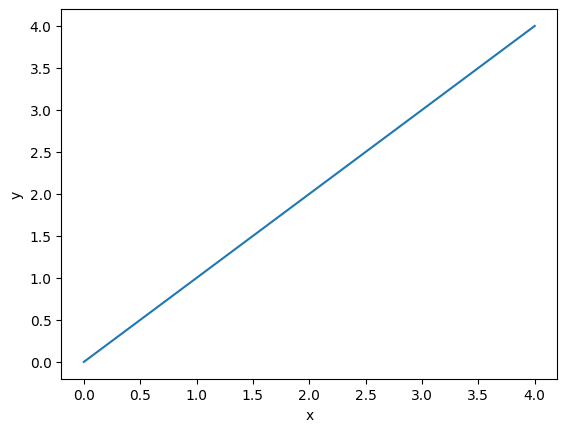

In [65]:
plt.plot([0, 1, 2, 3, 4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


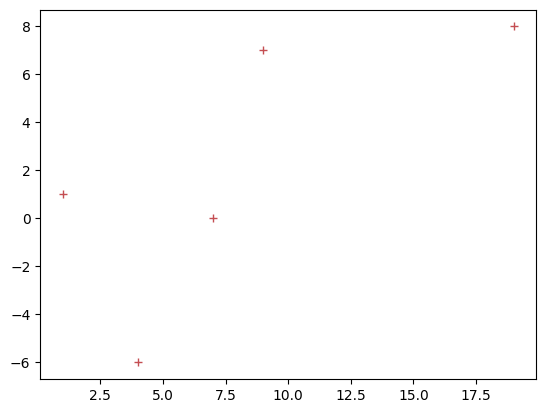

In [66]:
plt.plot([1, 4, 7, 19, 9], [1, -6, 0, 8, 7],
         'r+')
plt.show()


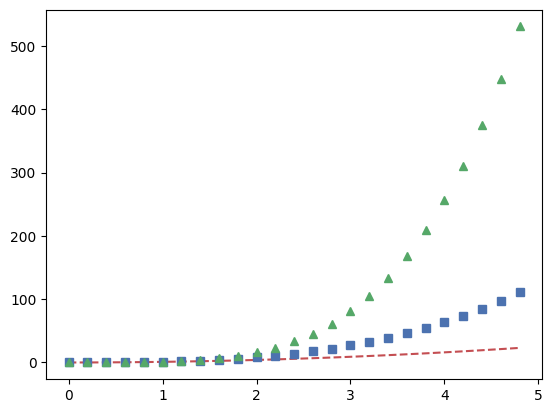

In [67]:
t = np.arange(0, 5, 0.2)

plt.plot(t, t**2, 'r--',
         t, t**3, 'bs',
         t, t**4, 'g^')
plt.show()


In [68]:
data = {
    'a': np.arange(500),
    'b': np.random.randint(0, 50, 500),
    'c': np.random.randn(500)
}


In [69]:
type(data)


dict

In [70]:
data['a'][:10]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

in standard normal distribution, data in around zero

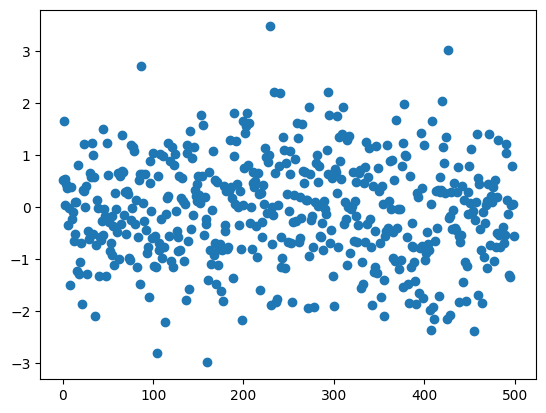

In [71]:
plt.scatter(data['a'], data['c'])
plt.show()


### <a id='toc1_2_4_'></a>[Lesson 09: Simple Regression](#toc0_)

Understanding Data

Load Data

In [23]:
df = pd.read_csv('FuelConsumption.csv')

print(type(df))
df.head()


<class 'pandas.core.frame.DataFrame'>


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration

In [24]:
# Summarize of the data
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select some features to explore more

In [25]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Plot each of these features

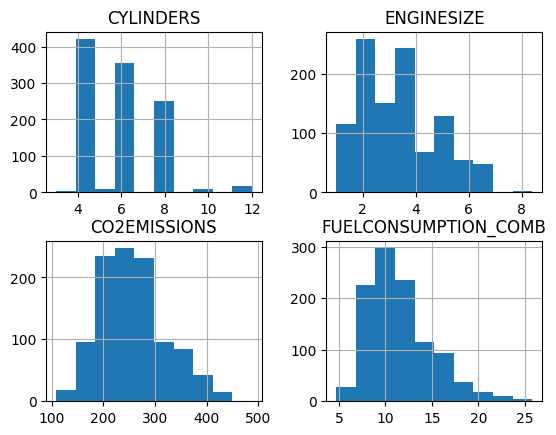

In [26]:
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]

viz.hist()
plt.show()


Plot each of these features against the Emission; to see how linear their relationship it

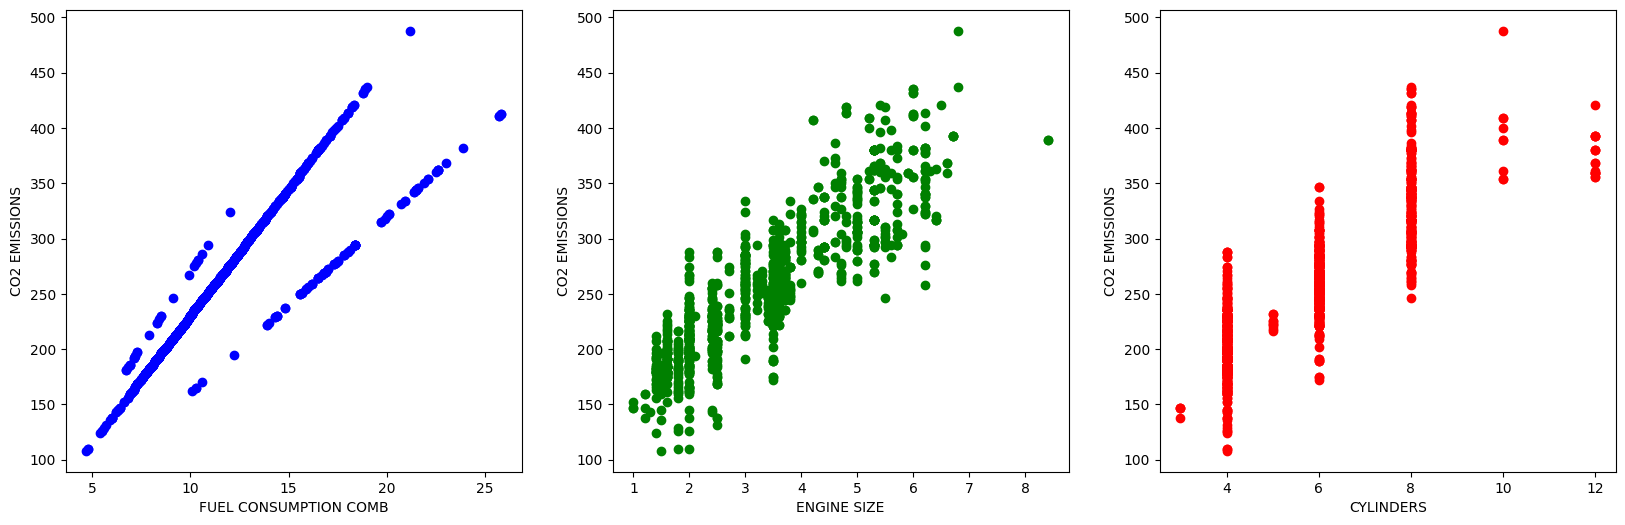

In [27]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUEL CONSUMPTION COMB')
plt.ylabel('CO2 EMISSIONS')

plt.subplot(1, 3, 2)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='green')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')

plt.subplot(1, 3, 3)
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSIONS')

plt.show()


Split data to Train and Test

(Same by `train_test_split()` function in sklearn module)

In [28]:
mask = np.random.rand(len(df)) < 0.8
mask[:-10]

train = cdf[mask]
test = cdf[~mask]  # ~ : symbol of Not; for pandas module


Train and Test length is changed in every run of above code

In [29]:
print('df shape:', df.shape)
print('cdf shape:', cdf.shape)

print()

print('Train shape:', train.shape)
print('test shape:', test.shape)

print()

print(f'Train Ration: {len(train) / len(cdf):.2f}')
print(f'Test Ration: {len(test) / len(cdf):.2f}')


df shape: (1067, 13)
cdf shape: (1067, 4)

Train shape: (861, 4)
test shape: (206, 4)

Train Ration: 0.81
Test Ration: 0.19


In [30]:
train


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [31]:
test


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
10,2.4,4,9.8,225
14,4.7,8,14.7,338
18,5.9,12,15.6,359
29,3.0,6,8.3,224
30,3.0,6,11.2,258
...,...,...,...,...
1042,1.4,4,5.4,124
1044,1.8,4,8.6,198
1048,2.0,4,7.1,192
1049,2.0,4,6.8,184


Simple Regression Model

Work with `ENGINESIZE` data for predict `CO2 EMISSIONS`

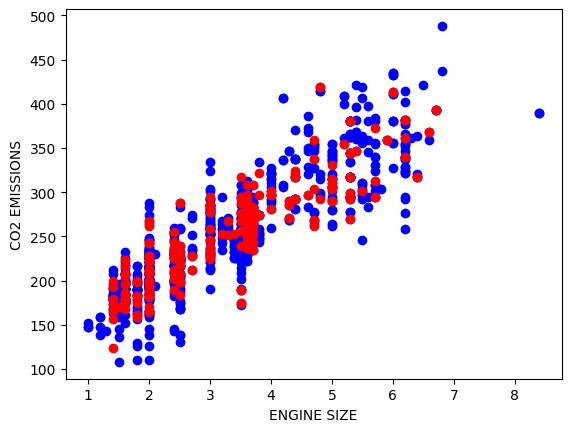

In [32]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')

plt.show()


Change type of data for calculate by `sklearn`

In [33]:
print(type(train['ENGINESIZE']))
print(type(np.asarray(train['ENGINESIZE'])))
print(type(np.asanyarray(train['ENGINESIZE'])))


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Calculation of parameters for the **prediction** of `CO2 EMISSIONS` by `ENGINE SIZE`

In [34]:
regr_model = linear_model.LinearRegression()

x_train = np.asanyarray(train[['ENGINESIZE']])  # X_ENGINESIZE_train
y_train = np.asanyarray(train[['CO2EMISSIONS']])  # y_CO2EMISSIONS_train

regr_model.fit(x_train, y_train)  # Fit Model

print('Coefficients:', regr_model.coef_)
print('Intercept:', regr_model.intercept_)


Coefficients: [[39.3202466]]
Intercept: [125.04957107]


In [35]:
print('x train shape:', x_train.shape)
print('y train shape', y_train.shape)


x train shape: (861, 1)
y train shape (861, 1)


$$ \hat{y_i} = \theta_0 + \theta_1 x_i $$

Plot output

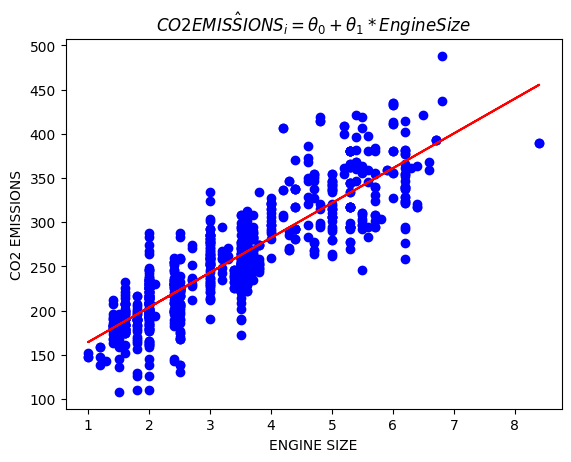

In [36]:
model_line = regr_model.intercept_[
    0] + regr_model.coef_[0][0]*x_train  # prediction model

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')  # Full data
plt.plot(x_train, model_line, '-r')  # prediction line

plt.title('$\hat{CO2 EMISSIONS_i} = \\theta_0 + \\theta_1 * EngineSize$')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()


Start work with `test` data

Calculate $ \hat{y_i} $

In [37]:
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

y_test_predicted = regr_model.predict(x_test)  # y_i hat


In [38]:
print('x test shape:', x_test.shape)
print('y test shape', y_test.shape)
print('y test predicted shpe:', y_test_predicted.shape)


x test shape: (206, 1)
y test shape (206, 1)
y test predicted shpe: (206, 1)


Calculate `MAE`, `MSE` and `R2 Score`

$ \text{MAE} = \frac{1}{n} \sum_{i=0}^{n} |y_i - \hat{y}_i| $

$ \text{MSE} = \frac{1}{n} \sum_{i=0}^{n} (y_i - \hat{y}_i)^2 $

<br>

$ SS_{residual} = \sum_{i=0}^{n} (y_i - \hat{y}_i)^2 $

$ SS_{total} \sum_{i=0}^{n} (y_i - \bar{y})^2 $

$ R^2 = 1 - \frac{SS_{residual}}{SS_{total}} $

In [39]:
MAE = np.mean(np.absolute(y_test_predicted - y_test))
MSE = np.mean((y_test_predicted - y_test) ** 2)
R2Score = r2_score(y_test, y_test_predicted)


print(f'MAE: {MAE:.3f}')  # Mean Absolute Error
print(f'MSE: {MSE:.3f}')  # Mean Square Error
print(f'R2 Score: {R2Score:.3f}')


MAE: 21.109
MSE: 773.293
R2 Score: 0.770


Inner model `Score` and `R2Score` in metrics module in sklearn

In [40]:
print(regr_model.score(x_test, y_test))  # Same by R2 Score
print(R2Score)

print(regr_model.score(x_test, y_test) == R2Score)


0.7695837425252836
0.7695837425252836
True


### <a id='toc1_2_5_'></a>[Lesson 12: Multipe Linear Regression](#toc0_)

Select some features that we want to use for regression

In [132]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
          'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Plot `Emission` values with respect to `Engine Size`

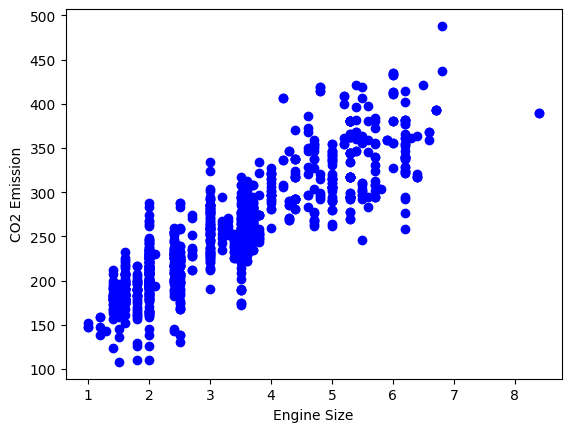

In [133]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')

plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()


Split data to *Train* and *Test*

In [134]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]


In [135]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)


Train shape: (859, 6)
Test shape: (208, 6)


Plot Train data

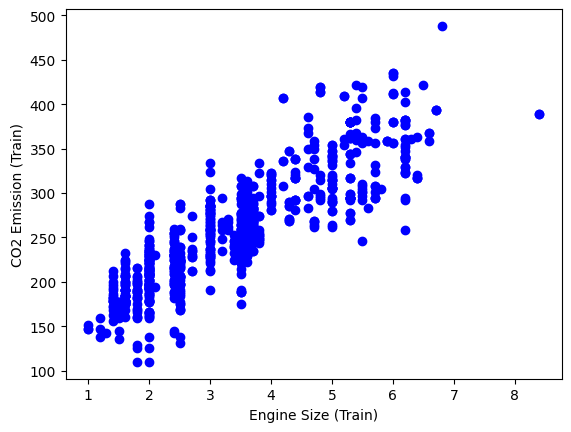

In [136]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

plt.xlabel('Engine Size (Train)')
plt.ylabel('CO2 Emission (Train)')
plt.show()


Multple Linear Regression Model

$$
 y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots 
$$

In [155]:
regr_model = linear_model.LinearRegression()

x_train = np.asanyarray(
    train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

regr_model.fit(x_train, y_train)

print('Coefficients:', regr_model.coef_)
print('Intercept:', regr_model.intercept_)


Coefficients: [[10.4432218   7.56485334  9.62327486]]
Intercept: [66.14011283]


Start work with `test` data

Split `testData` to `x_test` and `y_test`

In [138]:
x_test = np.asanyarray(
    test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])


Prediction ( Calculate $\hat{y_i}$ )

In [139]:
y_test_predicted = regr_model.predict(x_test)  # y_i hat


Calculate `MSE` and `R2 Score`

In [140]:
MSE = np.mean((y_test_predicted - y_test) ** 2)
R2Score = r2_score(y_test, y_test_predicted)

print(f'MSE: {MSE:.3f}')
print(f'R2 Score: {R2Score:.3f}')


MSE: 470.543
R2 Score: 0.890


Compare inner model `Score` and `R2Score` in metrics module in sklearn

In [141]:
regr_model.score(x_test, y_test) == R2Score


True

---

**Note:** Work with other module

- model 1: `sklearn`
- model 2: `statsmodels`

`sklearn` module

In [357]:
model1 = linear_model.LinearRegression()

x = np.array([1, 10, 60, 4.2, 2, 33]).reshape(-1, 1)
y = np.array([10, 1, 30.6, 44, 3, 13])

model1.fit(x, y)
y_hat = model1.predict(x)
R2Score1 = r2_score(y, y_hat)

print('Coefficients:', model1.coef_[0])
print('Intercept:', model1.intercept_)
print('R2 Score:', R2Score1)


Coefficients: 0.21873273625177872
Intercept: 12.915942077508998
R2 Score: 0.09320598920546119


**Other Way** 

Work with `Stats Models` module

(_more results_ and Similar by _R language result_)

In [373]:
import statsmodels.api as sm

x = np.array([1, 10, 60, 4.2, 2, 33])
y = np.array([10, 1, 30.6, 44, 3, 13])

x1 = sm.add_constant(x)  # Add a column of ones to an array (Necessary).
ols = sm.OLS(y, x1)  # OLS: Ordinary Least Squares method.
model2 = ols.fit()


Summary of results

In [374]:
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                 -0.133
Method:                 Least Squares   F-statistic:                    0.4111
Date:                Sun, 26 Mar 2023   Prob (F-statistic):              0.556
Time:                        17:39:05   Log-Likelihood:                -24.643
No. Observations:                   6   AIC:                             53.29
Df Residuals:                       4   BIC:                             52.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9159      9.660      1.337      0.2

c:\Users\ArminaRayaneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Other Summary of results

In [375]:
print(model2.summary2())


                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.133 
Dependent Variable: y                AIC:                53.2862
Date:               2023-03-26 17:39 BIC:                52.8697
No. Observations:   6                Log-Likelihood:     -24.643
Df Model:           1                F-statistic:        0.4111 
Df Residuals:       4                Prob (F-statistic): 0.556  
R-squared:          0.093            Scale:              324.39 
------------------------------------------------------------------
          Coef.    Std.Err.     t      P>|t|     [0.025     0.975]
------------------------------------------------------------------
const    12.9159     9.6602   1.3370   0.2522   -13.9051   39.7370
x1        0.2187     0.3411   0.6412   0.5563    -0.7284    1.1659
----------------------------------------------------------------
Omnibus:               nan         Durbin-Watson:          2.140
Prob(Omnibus):         nan      

c:\Users\ArminaRayaneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Get inner values

In [376]:
p_value = model2.pvalues
R2Score2 = model2.rsquared
Residuals = model2.resid

print('P Value:', p_value)
print('R2 Score:', R2Score2)
print('Residuals:', Residuals)


P Value: [0.25218692 0.55628289]
R2 Score: 0.09320598920546119
Residuals: [ -3.13467481 -14.10326944   4.56009375  30.16538043 -10.35340755
  -7.13412237]


---

### <a id='toc1_2_6_'></a>[Lesson 14: Polynomial Regression](#toc0_)

In [495]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Plot `ENGINE SIZE` vs `CO2 EMISSIONS` data

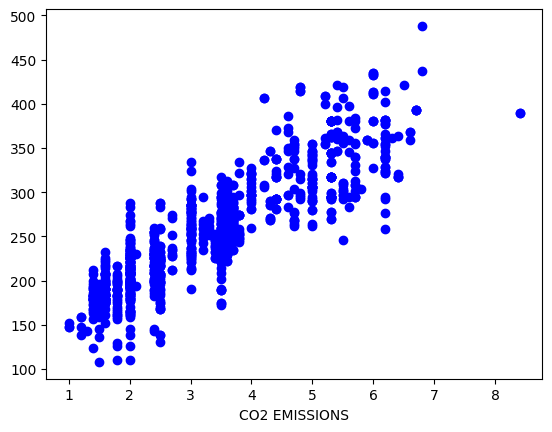

In [496]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')

plt.xlabel('ENGINE SIZE')
plt.xlabel('CO2 EMISSIONS')
plt.show()


Split data to `Train` and `Test`

In [497]:
mask = np.random.rand(len(df)) < 0.8

train = cdf[mask]
test = cdf[~mask]


In [498]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)


Train shape: (852, 4)
Test shape: (215, 4)


In [499]:
#  Train data
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

#  Test data
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])


In [500]:
print('X_Train shape:', x_train.shape)
print('Y_Train shape:', y_train.shape)
print()
print('X_Test shape:', x_test.shape)
print('Y_Test shape:', y_test.shape)


X_Train shape: (852, 1)
Y_Train shape: (852, 1)

X_Test shape: (215, 1)
Y_Test shape: (215, 1)


In [501]:
print(x_train[:5])


[[2. ]
 [2.4]
 [1.5]
 [3.5]
 [3.5]]


$$ (x Train Poly)_j  =  (x Train)_j^i $$

$$ i = 0,1,2, ... ,degree$$

$$ j = 1,2,..., length(data \; row) $$

$$ ( X_1,\; X_2,\; X_3 ) \longleftarrow  ( X^0,\; X^1,\; X^2 )  $$

In [502]:
degree = 2  # from 0 to 2 degree
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)  # Or poly.transform(x_train)

print(x_train_poly[:5])


[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 [ 1.    3.5  12.25]
 [ 1.    3.5  12.25]]


In [503]:
regr_model = linear_model.LinearRegression()

regr_model.fit(x_train_poly, y_train)


coefs = regr_model.coef_
intercept = regr_model.intercept_

print('Coefficients:', coefs)
print('Intercept:', intercept)


Coefficients: [[ 0.         46.67676191 -1.01379054]]
Intercept: [113.4489805]


Ploting

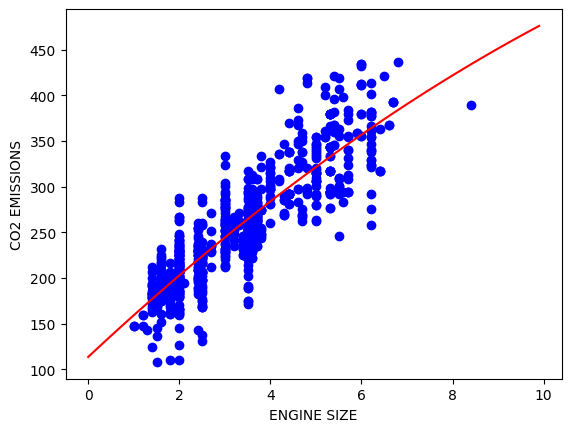

In [504]:
x_sequence = np.arange(0.0, 10.0, 0.1)
model_line = intercept[0] + coefs[0][0]*x_sequence + \
    coefs[0][1]*x_sequence + coefs[0][2]*np.power(x_sequence, 2)


plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(x_sequence, model_line, 'r')

plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()


`Model Evaluation` and work with `Test data`

In [505]:
x_test_poly = poly.fit_transform(x_test)

y_test_predicted = regr_model.predict(x_test_poly)  # Prediction


In [506]:
MSE = np.mean((y_test_predicted - y_test) ** 2)
R2Score = r2_score(y_test, y_test_predicted)

print(f'MSE: {MSE:0.3f}')
print(f'R2 Score: {R2Score:0.3f}')


MSE: 1001.869
R2 Score: 0.773


### <a id='toc1_2_7_'></a>[Lesson 15: Non Linear Regression Analysis](#toc0_)

**Note:** _See this lesson notebook_

## <a id='toc1_3_'></a>[03 - Classification](#toc0_)

### <a id='toc1_3_1_'></a>[Lesson 05: KNN (K-Nearest Neighbors)](#toc0_)

In [222]:
df = pd.read_csv('teleCust1000t.csv')

print('df shape:', df.shape)
df.head()


df shape: (1000, 12)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Data Visualization and Analysis

See how many of each clas is in our data set

`custcat` : Customer Category ( _y label_ )

In [223]:
df['custcat'].value_counts()


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

We can easilly explore our data using visualization techniques:

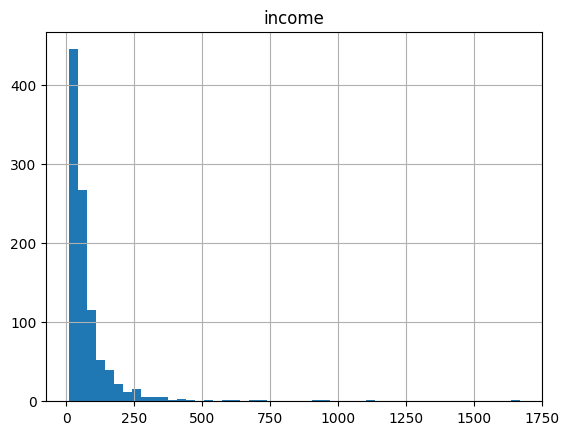

In [224]:
df.hist(column='income', bins=50)
plt.show()


Feature set

define feature sets, _X_:

In [225]:
df.columns


Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

**Note:** To use scikit-learn, we have to convert the Pandas data frame to a Numpy array:

`X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values`

Or

In [226]:
X = df.iloc[:, :-1].values  # astype(float)

X[:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

Labels

In [227]:
y = df['custcat'].values

y[:5]


array([1, 4, 3, 1, 3], dtype=int64)

**Normalize Data:** Data Standardiation given the data _zero mean_ and _unit variance_, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

$$ Z_i = \frac{X_i - \mu}{\sigma} $$

In [397]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X.astype(float))  # astype(float) is for Numpy

print(X_scaled[0:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


In [398]:
print('Each columns Mean:\n', X_scaled.mean(axis=0))
print('\nEach columns STD:\n', X_scaled.std(axis=0))


Each columns Mean:
 [ 2.16715534e-16 -1.61648472e-16  1.98951966e-16 -2.66453526e-18
 -2.66453526e-17  4.08562073e-17  1.70530257e-16 -2.84217094e-17
 -8.79296636e-17  2.13162821e-17  2.66453526e-17]

Each columns STD:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Train test Split

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

In [400]:
print('Train set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)


Train set shape: (800, 11) (800,)
Test set shape: (200, 11) (200,)


Classification

K Nearest Neighbir (KNN)

import library:

`from sklearn.neighbors import KNeighborsClassifier`

Training

Start the algorithm with `k=4` for now:

In [401]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

neigh

KNeighborsClassifier(n_neighbors=4)

**Note:** $$ \text{fit} == \text{learning} $$

Predicting

We can use the model to make predictions on the _test_ data set:

In [402]:
y_hat = neigh.predict(X_test)

y_hat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

Accuracy evaluation

In [403]:
train_acc = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_acc = metrics.accuracy_score(y_test, y_hat)

print('Train set Accuracy: ', train_acc)
print('Test set Accuracy: ', test_acc)

# print('Inner Score Accuracy: ', neigh.score(X_test, y_test))


Train set Accuracy:  0.5475
Test set Accuracy:  0.32


For `k=6`;

(work with _inner Accuracy score function_):

In [404]:
k = 6
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

print('Train set Accuracy: ', neigh.score(X_train, y_train))
print('Test set Accuracy: ', neigh.score(X_test, y_test))


Train set Accuracy:  0.51625
Test set Accuracy:  0.31


We can calculate the accuracy of KNN for different value of _k_.

In [405]:
Ks = 10
train_accs = np.zeros(Ks)  # train Accuracys
test_accs = np.zeros(Ks)  # test Accuracys

for k in range(1, Ks+1):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_accs[k-1] = neigh.score(X_train, y_train)
    test_accs[k-1] = neigh.score(X_test, y_test)


print('Train Accuracys:', train_accs)
print('\nTest Accuracys:', test_accs)

Train Accuracys: [1.      0.6175  0.56875 0.5475  0.5375  0.51625 0.5125  0.4925  0.5025
 0.4875 ]

Test Accuracys: [0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34  0.33 ]


Plot the model accuracy for a different number of neighbors

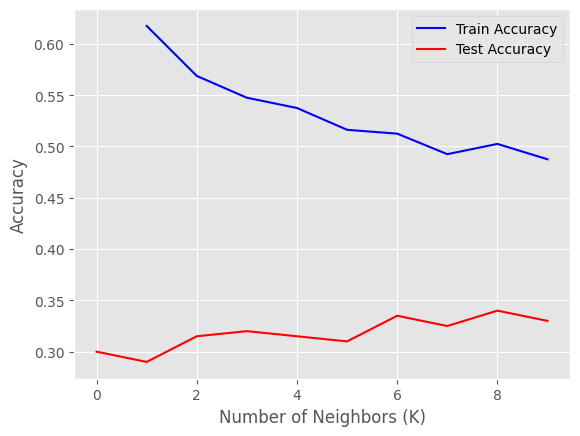

In [406]:
with plt.style.context('ggplot'):

    plt.plot(range(len(train_accs))[1:], train_accs[1:], color='blue', label='Train Accuracy')
    plt.plot(range(len(test_accs)), test_accs, color='red', label='Test Accuracy')

    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Accuracy')
    plt.legend()

plt.show()


In [407]:
print(f'The best Test Accuracy was with {test_accs.max()} with k={test_accs.argmax()}')


The best Test Accuracy was with 0.34 with k=8


---

New Observation

In [425]:
new_X = [[2, 15, 44, 2, 9, 1500, 4, 9, 0, 0, 6],
         [4, 5, 57, 3, 5, 300, 4, 5, 1, 0, 1]]   # Two new Observation

new_X_scaled = scaler.transform(new_X)  # Scaling new Obs. with fitted parameters of the model (model == Train data set)

new_y_hat = neigh.predict(new_X_scaled)  # Predicting the new observations


print(f'The Class of new observations is: {new_y_hat}')

The Class of new observations is: [4 3]


---

### <a id='toc1_3_2_'></a>[Lesson 09: Decision Trees](#toc0_)

In [3]:
df = pd.read_csv('drug200.csv', delimiter=',')

print('Data shape:', df.shape)
df.head()

Data shape: (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


PreProcessing

- `X` is the _Feature Matrix_
- `y` is the _response vectore_

In [4]:
X = df.iloc[:,:-1].values
y = df['Drug'].values

print(X[:5])
print(y[:5])

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]
['drugY' 'drugC' 'drugC' 'drugX' 'drugY']


Label frequency:

In [5]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

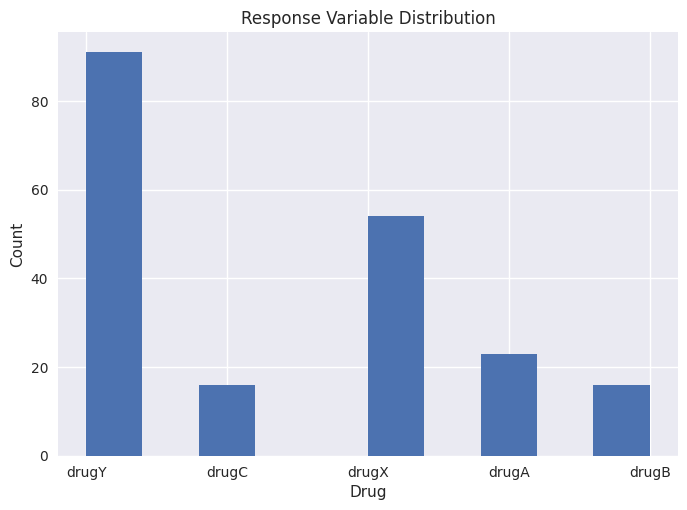

In [6]:
with plt.style.context('seaborn'):
    df['Drug'].hist()

    plt.title('Response Variable Distribution')
    plt.xlabel('Drug')
    plt.ylabel('Count')

plt.show()

Numericaling Factorical value (Labaling) `Sex`, `BP`, `Cholesterol`:

In [7]:
print('Age:', np.unique(X[:, 1]))
print('BP:', np.unique(X[:, 2]))
print('Cholesterol:', np.unique(X[:, 3]))


Age: ['F' 'M']
BP: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']


**Note:** The code below should be applied to the data only **once**

it gives an _error_ for the next time

In [8]:
le_sex = preprocessing.LabelEncoder().fit(['F', 'M'])  # label Sex
X[:, 1] = le_sex.transform(X[:, 1])

le_BP = preprocessing.LabelEncoder().fit(['HIGH', 'LOW', 'NORMAL'])  # label BP
X[:, 2] = le_BP.transform(X[:, 2])

le_Chol = preprocessing.LabelEncoder().fit(['HIGH', 'NORMAL'])  # label Cholesterol
X[:, 3] = le_Chol.transform(X[:, 3])


Primary X data:

In [9]:
df.iloc[:, :-1].head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


Transformed X data:

In [10]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Setting up the _Decision Tree_

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


In [12]:
print('Train set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)


Train set shape: (140, 5) (140,)
Test set shape: (60, 5) (60,)


Modeling:

In [13]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

_Fit_ the data with the Training feature matrix `X_train` and training response vector `y_train`

In [14]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Prediction

In [15]:
y_hat = drugTree.predict(X_test)  # predTree

In [16]:
print('y_hat:', y_hat[:5])
print('y_test:', y_test[:5])


y_hat: ['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
y_test: ['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


Evaluation

In [17]:
accScoreTree = metrics.accuracy_score(y_test, y_hat)
accScoreInnerTree = drugTree.score(X_test, y_test)

print("DecisionTrees's Accuracy:", accScoreTree)
print("DecisionTrees's Accuracy (Inner function):", accScoreInnerTree)


DecisionTrees's Accuracy: 0.9833333333333333
DecisionTrees's Accuracy (Inner function): 0.9833333333333333


Visualization

visualization the Tree

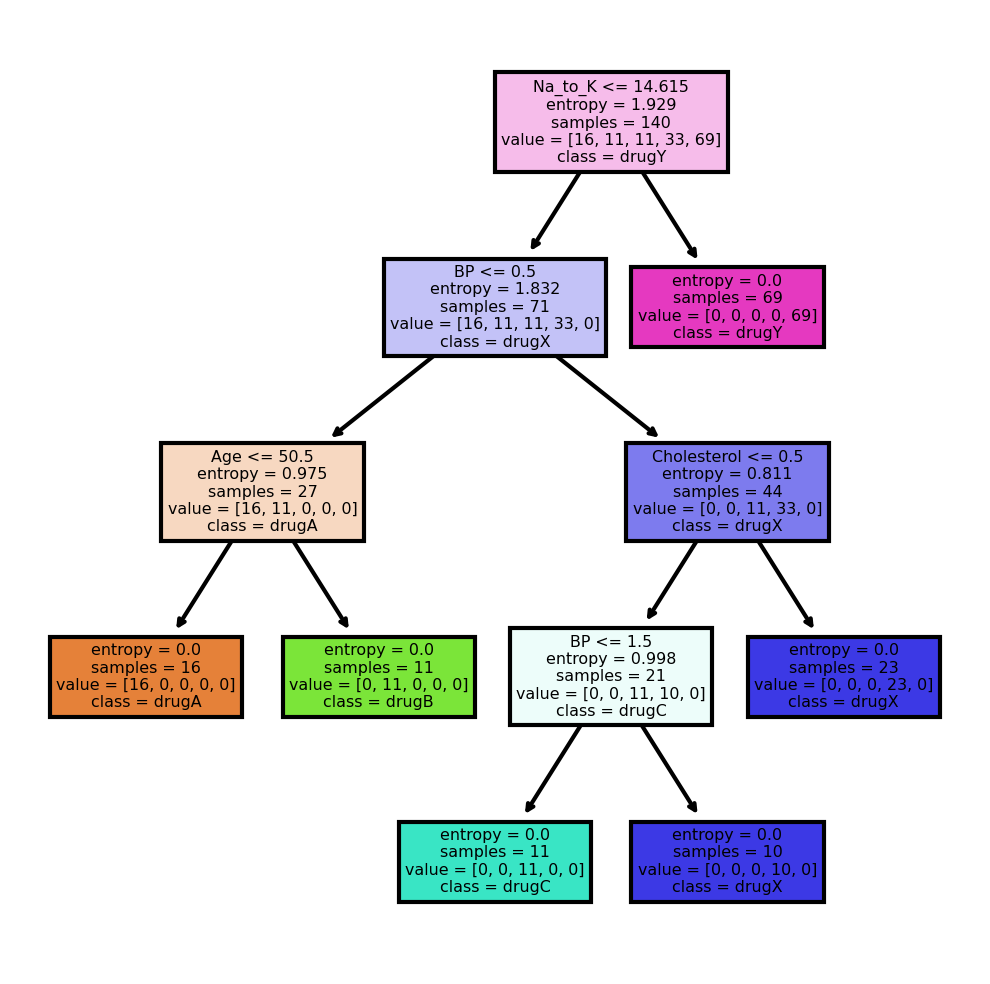

In [62]:
featureNames = df.columns[0:5]
classNames = np.unique(y_train)

plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)  # plot's base Options

tree.plot_tree(drugTree, feature_names=featureNames, class_names=classNames, filled=True)  # Draw Tree Plot

plt.show()


### <a id='toc1_3_3_'></a>[Lesson 14: Logistic Regression](#toc0_)

**Note:** in _Logistic Regression_, `Y` is a _Categorical value_ and **All** `X`s should be _Continues_ or converted to _Continues_.